# Test assignment for Product Analyst

### Preparation

In [ ]:
!pip install prophet

In [ ]:
# libraries import
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from prophet import Prophet

In [ ]:
# function for importing data from Google Sheets

def google(spreadsheet_id, sheet_name):

    file_name = (
        'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'
        .format(spreadsheet_id)
        )
    r = requests.get(file_name)
    df = pd.read_excel(BytesIO(r.content), sheet_name=sheet_name)

    return df

In [ ]:
# file link
fl = '1V4cfpL1cPRfrOjZJ9eTgZoWf6gNsgiln'

# data reading
task1 = google(fl, 'Task 1')
task2 = google(fl, 'Task 2')
task3 = google(fl, 'Task 3')

In [ ]:
# function for primary data review

def first_check(data):

    print('First 10 lines \n')
    display(data.head(10))

    print('-' * 50)
    print('Last 10 lines \n')
    display(data.tail(10))

    print('-' * 50)
    print('Table info \n')
    print(data.info())

    print('-' * 50)
    print('Duplicates count:', data.duplicated().sum())

In [ ]:
first_check(task1)

First 10 lines 



,Date,Revenue ($)
0,2022-03-01,7878261
1,2022-03-02,7995176
2,2022-03-03,9887822
3,2022-03-04,10067265
4,2022-03-05,9018922
5,2022-03-06,7372050
6,2022-03-07,7634777
7,2022-03-08,7348619
8,2022-03-09,7590490
9,2022-03-10,7985246


--------------------------------------------------
Last 10 lines 



,Date,Revenue ($)
235,2022-10-22,5829682
236,2022-10-23,6056116
237,2022-10-24,6206330
238,2022-10-25,6257772
239,2022-10-26,6827791
240,2022-10-27,7789467
241,2022-10-28,6911239
242,2022-10-29,6971250
243,2022-10-30,6870345
244,2022-10-31,7780850


--------------------------------------------------
Table info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         245 non-null    datetime64[ns]
 1   Revenue ($)  245 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 KB
None
--------------------------------------------------
Duplicates count: 0


In [ ]:
# rename columns for convenience
task1.columns = ['date', 'revenue']

In [ ]:
first_check(task2)

First 10 lines 



,UserID,Country,Group,Unnamed: 3,Unnamed: 4,UserID.1,Date,Revenue (BYN)
0,1.0,US,Target,NaN,NaN,2,2022-05-08,47.4
1,2.0,EU,Target,NaN,NaN,3,2022-05-02,72.0
2,3.0,NaN,Target,NaN,NaN,5,2022-05-09,25.8
3,4.0,SEA,Target,NaN,NaN,6,2022-05-14,17.4
4,5.0,US,Control,NaN,NaN,9,2022-05-08,64.8
5,6.0,EU,Control,NaN,NaN,10,2022-05-06,40.8
6,7.0,NaN,Control,NaN,NaN,11,2022-05-09,9.6
7,8.0,SEA,Control,NaN,NaN,14,2022-05-12,60.6
8,9.0,US,Target,NaN,NaN,17,2022-05-03,3.3
9,10.0,EU,Target,NaN,NaN,18,2022-05-10,34.2


--------------------------------------------------
Last 10 lines 



,UserID,Country,Group,Unnamed: 3,Unnamed: 4,UserID.1,Date,Revenue (BYN)
378514,NaN,NaN,NaN,NaN,NaN,39990,2022-05-13,25.5
378515,NaN,NaN,NaN,NaN,NaN,39991,2022-05-09,35.7
378516,NaN,NaN,NaN,NaN,NaN,39992,2022-05-10,10.2
378517,NaN,NaN,NaN,NaN,NaN,39993,2022-05-02,45.0
378518,NaN,NaN,NaN,NaN,NaN,39994,2022-05-02,27.3
378519,NaN,NaN,NaN,NaN,NaN,39995,2022-05-14,48.0
378520,NaN,NaN,NaN,NaN,NaN,39996,2022-05-13,54.3
378521,NaN,NaN,NaN,NaN,NaN,39998,2022-05-12,13.5
378522,NaN,NaN,NaN,NaN,NaN,39999,2022-05-12,61.2
378523,NaN,NaN,NaN,NaN,NaN,40000,2022-05-12,50.7


--------------------------------------------------
Table info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378524 entries, 0 to 378523
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   UserID         40000 non-null   float64       
 1   Country        30000 non-null   object        
 2   Group          40000 non-null   object        
 3   Unnamed: 3     0 non-null       float64       
 4   Unnamed: 4     0 non-null       float64       
 5   UserID.1       378524 non-null  int64         
 6   Date           378524 non-null  datetime64[ns]
 7   Revenue (BYN)  378524 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 23.1+ MB
None
--------------------------------------------------
Duplicates count: 549


In [ ]:
# create table with users info
# drop lines without user id
task2_users = task2[['UserID', 'Country', 'Group']].dropna(subset=['UserID'])

# rename columns for convenience
task2_users.columns = ['user_id', 'country', 'group']

In [ ]:
# create table with revenue info
task2_rev = task2[['UserID.1', 'Date', 'Revenue (BYN)']]

# rename columns for convenience
task2_rev.columns = ['user_id', 'date', 'revenue']

In [ ]:
first_check(task3)

First 10 lines 



,Active monthly subscribers amount,Date,Trial,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,...,Month 15,Month 16,Month 17,Month 18,Month 19,Month 20,Month 21,Month 22,Month 23,Month 24
0,NaN,2020-04-01,1501,711,437.0,286.0,206.0,142.0,116.0,95.0,...,32.0,27.0,21.0,18.0,15.0,14.0,11.0,9.0,NaN,NaN
1,NaN,2020-05-01,1253,544,338.0,246.0,178.0,138.0,109.0,89.0,...,21.0,19.0,16.0,15.0,15.0,13.0,13.0,NaN,NaN,NaN
2,NaN,2020-06-01,1226,522,319.0,228.0,169.0,133.0,99.0,82.0,...,27.0,26.0,25.0,23.0,21.0,19.0,NaN,NaN,NaN,NaN
3,NaN,2020-07-01,1484,538,297.0,201.0,147.0,112.0,85.0,77.0,...,32.0,30.0,23.0,20.0,18.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-08-01,2009,775,449.0,317.0,257.0,198.0,170.0,148.0,...,51.0,41.0,38.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2020-09-01,2132,940,580.0,384.0,289.0,225.0,177.0,146.0,...,44.0,39.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2020-10-01,1231,467,279.0,196.0,148.0,103.0,84.0,62.0,...,21.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2020-11-01,1035,392,194.0,128.0,118.0,80.0,65.0,65.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2020-12-01,511,241,127.0,94.0,87.0,57.0,51.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2021-01-01,2167,756,439.0,311.0,244.0,186.0,140.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------
Last 10 lines 



,Active monthly subscribers amount,Date,Trial,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,...,Month 15,Month 16,Month 17,Month 18,Month 19,Month 20,Month 21,Month 22,Month 23,Month 24
12,NaN,2021-04-01,961,413,190.0,144.0,130.0,80.0,70.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,2021-05-01,1018,400,195.0,144.0,132.0,76.0,74.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,2021-06-01,1009,336,178.0,116.0,107.0,66.0,59.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,2021-07-01,5507,1607,898.0,631.0,485.0,367.0,298.0,251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,2021-08-01,15545,4001,2144.0,1445.0,1063.0,840.0,671.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,2021-09-01,4504,1498,859.0,588.0,437.0,343.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,2021-10-01,7335,1598,865.0,594.0,439.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,2021-11-01,6890,1806,931.0,611.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,2021-12-01,1425,711,352.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,2022-01-01,1793,626,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------
Table info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Active monthly subscribers amount  0 non-null      float64       
 1   Date                               22 non-null     datetime64[ns]
 2   Trial                              22 non-null     int64         
 3   Month 1                            22 non-null     int64         
 4   Month 2                            21 non-null     float64       
 5   Month 3                            20 non-null     float64       
 6   Month 4                            19 non-null     float64       
 7   Month 5                            18 non-null     float64       
 8   Month 6                            17 non-null     float64       
 9   Month 7                            16 non-null 

In [ ]:
# remove the first column (empty)
task3 = task3.drop(list(task3)[0], axis=1)

In [ ]:
# rename columns for convenience
task3.columns = [i.lower().replace(' ', '_') for i in list(task3)]

### Task 1

**Problem statement**

You have the dynamics of users' mobile app subscription payments from March to October 2022. On 1 October 2022, a new version of the app was released. From 10 October 2022 to 12 October 2022, users could subscribe at a discount.

**The task**

You need to analyze the revenue growth and prepare a brief report with data visualization.


Let's prepare the data and create plots at first.

In [ ]:
# column with month
task1['month'] = task1['date'].dt.to_period('M').dt.to_timestamp()
# column with revenue in millions
task1['rev_m'] = task1['revenue'] / 1000000

In [ ]:
# table with revenue sum grouped by month
task1_gr = task1.groupby('month').agg({'rev_m': 'sum'}).reset_index()

In [ ]:
# converting dates to numbers to plot a trend
task1_gr['date_num'] = (task1_gr['month'] - task1_gr['month'].min()).dt.days

# construction of linear regression
z = np.polyfit(task1_gr['date_num'], task1_gr['rev_m'], 1)
p = np.poly1d(z)

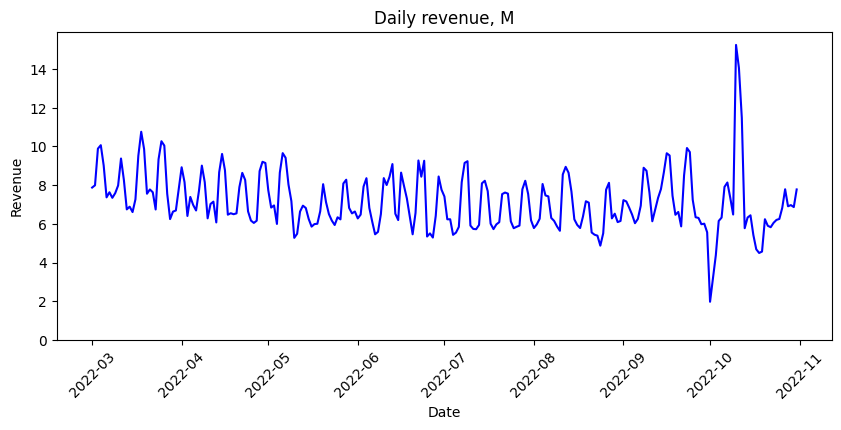

In [ ]:
# create a graph for daily revenue
plt.figure(figsize=(10, 4))
plt.plot(task1['date'], task1['rev_m'], linestyle='-', color='b')
plt.title('Daily revenue, M')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.ylim(bottom=0)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# min revenue
task1.loc[task1['revenue'] == task1['revenue'].min()][['date', 'rev_m']]

,date,rev_m
214,2022-10-01,1.978644


In [ ]:
# max revenue
task1.loc[task1['revenue'] == task1['revenue'].max()][['date', 'rev_m']]

,date,rev_m
223,2022-10-10,15.246113


In [ ]:
# avg revenue for the whole period
task1['rev_m'].mean()

7.158634032653062

In [ ]:
# table with revenue sum for the first 15 days of october 2022
task1_15 = (
    task1.loc[task1['month'] == '2022-10-01'][['date', 'rev_m']]
    .sort_values(by='date')
    .head(15)
)

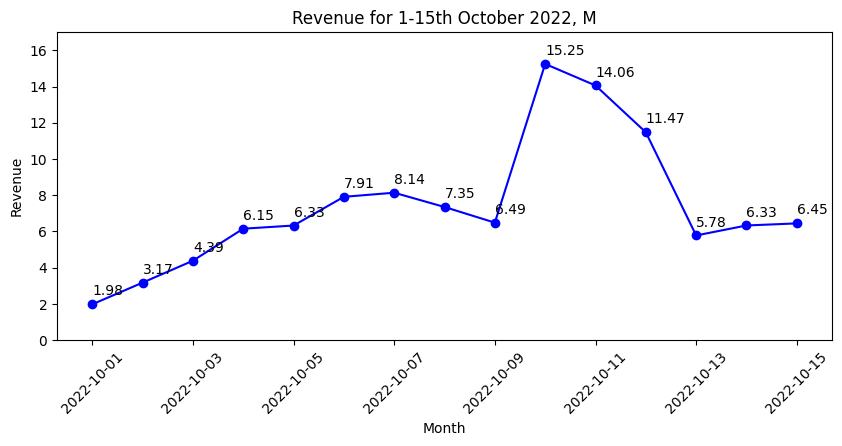

In [ ]:
# create a graph for revenue for the first 15 days of october 2022
plt.figure(figsize=(10, 4))
plt.plot(task1_15['date'], task1_15['rev_m'], marker='o', linestyle='-', color='b', label='revenue')
plt.title('Revenue for 1-15th October 2022, M')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.ylim(bottom=0, top=17)
plt.xticks(rotation=45)

for d, r in zip(task1_15['date'], task1_15['rev_m'].round(2)):
    plt.text(d, r+0.5, r)

plt.show()

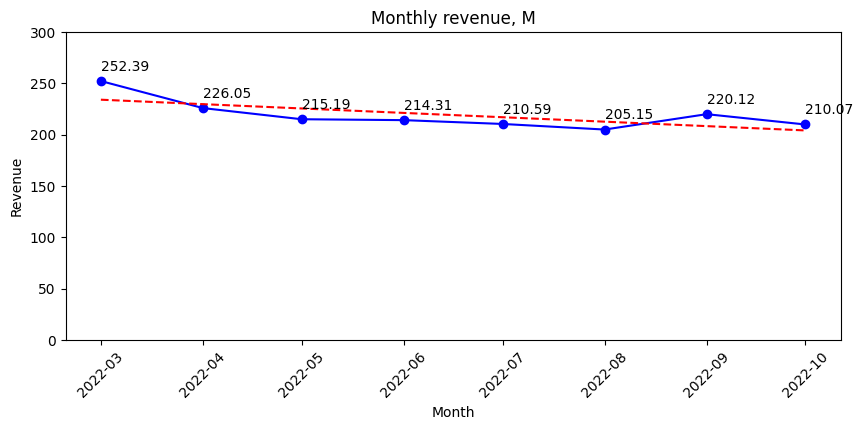

In [ ]:
# create a graph for monthly revenue
plt.figure(figsize=(10, 4))
plt.plot(task1_gr['month'], task1_gr['rev_m'], marker='o', linestyle='-', color='b', label='revenue')
plt.plot(task1_gr['month'], p(task1_gr['date_num']), linestyle='--', color='r', label='trend line')
plt.title('Monthly revenue, M')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.ylim(bottom=0, top=300)
plt.xticks(rotation=45)

for d, r in zip(task1_gr['month'], task1_gr['rev_m'].round(2)):
    plt.text(d, r+10, r)

plt.show()

**Findings**

On the daily revenue graph you can see two sudden changes of revenue dinamics at the begginig of October 2022:

* 1.98M on 01/10/2022, that differ to the average figure of the whole period (7.16M) in 3.6 times. On this day the new app version was released. And as you can see it wasn't sucsessful. Considering the weekly seasonality, the release of the new version on Saturday (one of the most profitable days of week) showed the worst result of the whole period. I can suppose that there were some technical problems that were fixed in 3 days. As you can see on the graph for the first 15 days of October the revenue become 6M and more on the forth and following days after release.

* 15.25M on 10/10/2022, that 2 times more than the average figure of the whole period (7.16M). The revenue was higher as usual for the next two days because on this period new users could subscibe at a discount. And it was the start of the week that usually has the worst profitability. The good side is that the app made an almost week revenue for three days, but bad side is that this users stopped making purchases after discount period ending. That shows that this activity attracted freeloaders, not active profitable users. Maybe it is better to change the marketing strategy.

On the monthly graph you can see that the discount activity compensated the unsucsessful release, but the trend line shows that the revenue gradually decreases. It is better to research previous months in details, especially March, April and September. Maybe the marketing activity these months were more sucsessful.

### Task 2

**Problem statement**

To determine the best banner in the mobile app, a test group of users was offered a new version of the banner in a different color. The option to buy the paid features remained the same.
The A/B test was done from 8 May 2022 to 9 May 2022.

**The task**

You need to assess which banner is preferable to users from the US.

**Data**

Users table:
* UserID—the user’s identification number;
* Country—the region of sales;
* Group—the type of group of interest.

**Revenue table**

* UserID—the user’s identification number;
* Date—the date the user viewed the banner;
* Revenue—the revenue from the paid features.


In [ ]:
# find users from US that took part in the test
test_df = (
    task2_rev.loc[(task2_rev['date'] >= '2022-05-08') & (task2_rev['date'] <= '2022-05-09')]
    .merge(
        task2_users.loc[task2_users['country'] == 'US'],
        how = 'inner',
        left_on = 'user_id',
        right_on = 'user_id'
        )
    )

In [ ]:
# check test groups
test_df['group'].unique()

array(['Control', 'Target'], dtype=object)

In [ ]:
# group data to find the total revenue for every user
test_df = (
    test_df.groupby(['user_id', 'country', 'group'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

In [ ]:
# no overlap between groups check
test_df.groupby('user_id').agg({'group': 'nunique'}).reset_index().query('group > 1')

,user_id,group


In [ ]:
# no users duplicates check
test_df['user_id'].nunique() == test_df['user_id'].count()

True

In [ ]:
# since the conditions do not provide information about
# the required minimum number of users per group,
# will assume that these indicators correspond to those specified
# before the start of the test.

In [ ]:
test_df.head(5)

,user_id,country,group,revenue
0,1,US,Target,8.4
1,5,US,Control,35.7
2,9,US,Target,95.7
3,17,US,Target,67.8
4,25,US,Target,38.1


In [ ]:
# let's test the Sample Ratio Mismatch (SRM)
# derive the main indicators about the number of users

print(
    'Total users in two groups:',
    test_df['user_id'].count()
    )

print(
    'Number of users in one group if the distribution was 50/50:',
    test_df['user_id'].count() / 2
    )

print(
    'Number of users in control group:',
    test_df.loc[test_df['group'] == 'Control']['user_id'].nunique()
    )

print(
    'Number of users in test group:',
    test_df.loc[test_df['group'] == 'Target']['user_id'].nunique()
    )

print(
    'Actual split in percent:',
    round(
        test_df.loc[test_df['group'] == 'Control']['user_id'].nunique()
        / test_df['user_id'].count() * 100
        ),
    '/',
    round(
        test_df.loc[test_df['group'] == 'Target']['user_id'].nunique()
        / test_df['user_id'].count() * 100
        )
    )

Total users in two groups: 7911
Number of users in one group if the distribution was 50/50: 3955.5
Number of users in control group: 3819
Number of users in test group: 4092
Actual split in percent: 48 / 52


In [ ]:
# H0: The observed ratio of users in the test group to the control group
# does not differ from the expected ratio of 50/50.

# H1: The observed ratio of users in the test group to the control group
# differs from the expected ratio of 50/50.

In [ ]:
# expected number of users for two groups
expected_counts = [
    test_df['user_id'].nunique() / 2,
    test_df['user_id'].nunique() / 2
    ]

# actual number of users for two groups
actual_counts = [
    test_df.loc[test_df['group'] == 'Control']['user_id'].nunique(),
    test_df.loc[test_df['group'] == 'Target']['user_id'].nunique()
    ]

# calculating chi-square statistics and p-values
chi2, p_value = stats.chisquare(f_obs=actual_counts, f_exp=expected_counts)

print(f'Chi-squared Statistic: {chi2}')
print(f'P-value: {p_value}')

# check for Sample Ratio Mismatch
if p_value < 0.05:
    print('There is Sample Ratio Mismatch (SRM). Do not accept H0, the split is invalid.')
else:
    print('There is no Sample Ratio Mismatch (SRM). Accept H0, the split is valid.')

Chi-squared Statistic: 9.420932878270762
P-value: 0.002145223594900206
There is Sample Ratio Mismatch (SRM). Do not accept H0, the split is invalid.


In [ ]:
# Already at this stage the test can be considered unsuccessful,
# because the division of users between groups is not equal
# and statistical tests would show inaccurate results.

# If this had not happened, then the continuation would have been as follows.

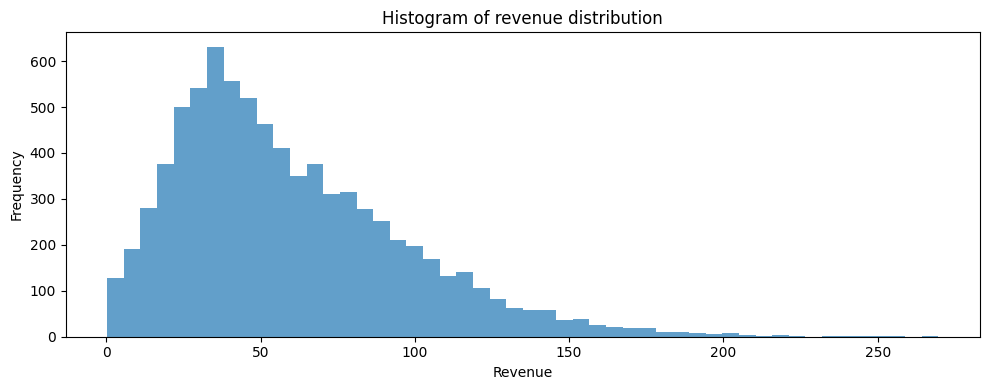

In [ ]:
# histigram for revenue
plt.figure(figsize=(10, 4))
plt.hist(test_df['revenue'], bins=50, alpha=0.7)
plt.title('Histogram of revenue distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

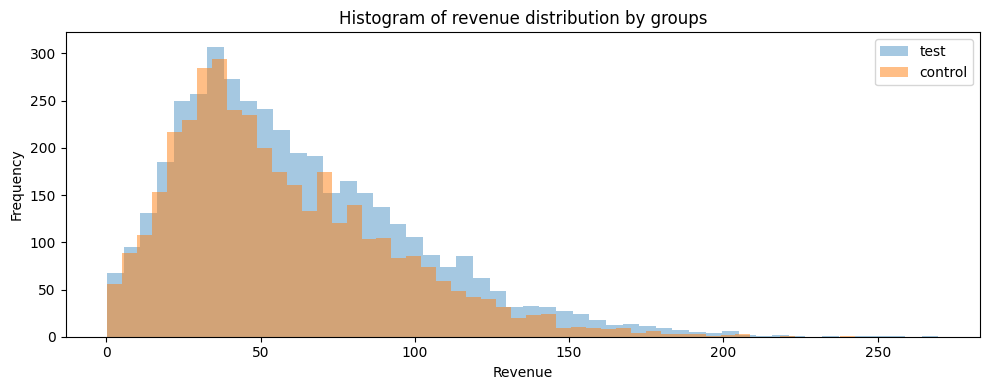

In [ ]:
# histigram for revenue by groups
plt.figure(figsize=(10, 4))
plt.hist(test_df.loc[test_df['group'] == 'Target']['revenue'], bins=50, alpha=0.4, label='test')
plt.hist(test_df.loc[test_df['group'] == 'Control']['revenue'], bins=50, alpha=0.5, label='control')
plt.title('Histogram of revenue distribution by groups')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()

plt.show()

In [ ]:
# the data set has a positively skewed distribution.
# the Mann-Whitney test is a good fit for this data set.
# derive the main metrics of revenue per user

print('Control group revenue:')
display(test_df.loc[test_df['group'] == 'Control']['revenue'].describe())

print()

print('Test group revenue:')
display(test_df.loc[test_df['group'] == 'Target']['revenue'].describe())

Control group revenue:


,revenue
count,3819.000000
mean,56.912726
std,35.136450
min,0.300000
25%,31.200000
50%,48.900000
75%,77.700000
max,242.700000



Test group revenue:


,revenue
count,4092.000000
mean,61.987390
std,38.709248
min,0.300000
25%,33.300000
50%,54.000000
75%,84.600000
max,269.700000


In [ ]:
# H0: Revenue values ​​do not differ between control and test groups.
# H0: Revenue values differ between control and test groups.

In [ ]:
# revenue data for every group
groupA = test_df.loc[test_df['group'] == 'Control']['revenue']
groupB = test_df.loc[test_df['group'] == 'Target']['revenue']

# conducting the Mann-Whitney test
stat, p_value = stats.mannwhitneyu(groupA, groupB)

print(f'U-stats: {stat}')
print(f'P-value: {p_value}')

# interpretation of results
alpha = 0.05
if p_value < alpha:
    print('There are significant differences between groups. Do not accept H0. The experiment can be considered successful.')
else:
    print('There are no significant differences between groups. Accept H0. The experiment can be considered unsuccessful.')

U-stats: 7267858.5
P-value: 7.567681450433256e-08
There are significant differences between groups. Do not accept H0. The experiment can be considered successful.


### Task 3

**Problem statement**

You have user data in the form of cohort analysis. The cost of the subscription purchased by mobile app users is $9.99.

**The task**

You need to calculate the expected LTV24 (how much the user will pay us during 24 months of using the app) based on the data available.

Mind that 30% of the subscription cost is charged by Apple in the first year and 15% in the second year.


In [ ]:
# raname columns
task3 = task3.rename(columns={'date': 'cohort', 'trial': 'month_0'})

In [ ]:
# unpivot months columns
task3 = pd.melt(task3, id_vars=['cohort'], var_name='month', value_name='users_cnt')

In [ ]:
# extract the lifetime month
task3['month'] = task3['month'].str.replace('month_', '').astype('int')

In [ ]:
# function to add lifetime months count to cohort month
def add_months(df):
    return df['cohort'] + pd.DateOffset(months=df['month'])

task3['month_'] = task3.apply(add_months, axis=1)

In [ ]:
# create dataset to train the model
# drop months without users & rename columns
test_tsk = (
    task3.dropna(subset='users_cnt')
    .rename(columns={'month_': 'ds', 'users_cnt': 'y'})
)

In [ ]:
# the empty dataset for the results
df_predict = pd.DataFrame()

In [ ]:
# predicted data is calculated for each cohort separately
for crt in task3['cohort'].unique():

  # filter known data for cohort and earlier cohorts
  df_test = test_tsk.loc[task3['cohort'] <= crt]

  # count periond for prediction
  periods = 25 - test_tsk.loc[task3['cohort'] == crt]['ds'].count()
  # define date for start prediction
  start = test_tsk.loc[task3['cohort'] == crt]['ds'].max()

  # logarithmic data transformation
  df_test['y'] = np.log(df_test['y'])

  # creation & training Prophet model
  model = Prophet()
  model.fit(df_test)

  # prediction for defined period
  future = pd.DataFrame(pd.date_range(start=start, periods=periods, freq='M'), columns=['ds'])
  forecast = model.predict(future)

  # transform the predicted values ​​back
  forecast['yhat'] = np.exp(forecast['yhat'])
  forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
  forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

  # add one day to predicted date to create the start of the month
  forecast['ds'] = forecast['ds'] + pd.to_timedelta(1, unit='D')

  # dataset with known data for cohort
  df = test_tsk.loc[task3['cohort'] == crt].drop(columns='month')

  # predicted data for cohort
  # upper prediction limit has better results
  df_forecast = pd.DataFrame({
    'cohort': crt,
    'ds': forecast['ds'],
    'y': forecast['yhat_upper']
})

  # create dataset with known & predicted data
  df = pd.concat([df, df_forecast]).reset_index(drop=True)

  # define previous lifetime month subs count
  df['prev_subs'] = df['y'].shift(-1)
  # define average subs count for previous and next lifetime month
  df['avg'] = (df['y'].shift(-1) + df['y'].shift(+1)) / 2
  # if subs count more than in previous month than return the average
  df['subs'] = np.where(df['y'] < df['prev_subs'], df['avg'], df['y'])


  df = df[['cohort', 'ds', 'subs']].rename(columns={'ds': 'month'})

  # add result to the main dataset
  df_predict = pd.concat([df_predict, df])

In [ ]:
# round subs count
df_predict['subs'] = round(df_predict['subs'])

In [ ]:
# let's see the result
first_check(df_predict)

First 10 lines 



,cohort,month,subs
0,2020-04-01,2020-04-01,1501.0
1,2020-04-01,2020-05-01,711.0
2,2020-04-01,2020-06-01,437.0
3,2020-04-01,2020-07-01,286.0
4,2020-04-01,2020-08-01,206.0
5,2020-04-01,2020-09-01,142.0
6,2020-04-01,2020-10-01,116.0
7,2020-04-01,2020-11-01,95.0
8,2020-04-01,2020-12-01,78.0
9,2020-04-01,2021-01-01,65.0


--------------------------------------------------
Last 10 lines 



,cohort,month,subs
15,2022-01-01,2023-04-01,111.0
16,2022-01-01,2023-05-01,107.0
17,2022-01-01,2023-06-01,96.0
18,2022-01-01,2023-07-01,84.0
19,2022-01-01,2023-08-01,76.0
20,2022-01-01,2023-09-01,68.0
21,2022-01-01,2023-10-01,57.0
22,2022-01-01,2023-11-01,55.0
23,2022-01-01,2023-12-01,52.0
24,2022-01-01,2024-01-01,48.0


--------------------------------------------------
Table info 

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   cohort  550 non-null    datetime64[ns]
 1   month   550 non-null    datetime64[ns]
 2   subs    550 non-null    float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 17.2 KB
None
--------------------------------------------------
Duplicates count: 0


In [ ]:
# counting lifetime months
df_predict['lt'] = (
    (df_predict['month'].dt.year - df_predict['cohort'].dt.year) * 12
    + df_predict['month'].dt.month - df_predict['cohort'].dt.month
)

In [ ]:
# group data by lifetime and find sum subs
final_df = df_predict.groupby('lt').agg({'subs': 'sum'}).reset_index()

In [ ]:
# define the subscription charge & costs
charge = 9.99
first_year_percent = 0.3
second_year_percent = 0.15

In [ ]:
# define revenue for one subscription
final_df['charge'] = np.where(
    final_df['lt'] == 0, 0,
    np.where(
        final_df['lt'] <= 12,
        charge - charge * first_year_percent,
        charge - charge * second_year_percent)
    )

In [ ]:
# define total revenue for every lifetime month
final_df['revenue'] = final_df['charge'] * final_df['subs']

In [ ]:
# define retention rate for every lifetime month
final_df['retention'] = final_df['subs'] / final_df['subs'].iloc[0]

In [ ]:
# view result
final_df

,lt,subs,charge,revenue,retention
0,0,62606.0,0.0000,0.0000,1.000000
1,1,19727.0,6.9930,137950.9110,0.315098
2,2,10887.0,6.9930,76132.7910,0.173897
3,3,7595.0,6.9930,53111.8350,0.121314
4,4,5734.0,6.9930,40097.8620,0.091589
5,5,4277.0,6.9930,29909.0610,0.068316
6,6,3423.0,6.9930,23937.0390,0.054675
7,7,2515.0,6.9930,17587.3950,0.040172
8,8,2040.0,6.9930,14265.7200,0.032585
9,9,1825.0,6.9930,12762.2250,0.029151


In [ ]:
# count ARPUMAU for 24 months lifetime with trial period
arpumau = final_df['revenue'].sum() / final_df['subs'].sum()
arpumau

3.7811973099238942

In [ ]:
# count average lifetime
lt_avg = final_df['retention'].sum()
lt_avg

2.119764878765614

In [ ]:
# count LTV24
arpumau * lt_avg

8.01524925725969